In [63]:
import cv2
import os
import imutils
import numpy as np
import matplotlib.pyplot as plt

import time
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix

dataPath = 'E:/Fotos TFM'
typeLeavesList = os.listdir(dataPath)

print('Lista carpetas: ', typeLeavesList)

labels = []
leavesData = []
label = 0



Lista carpetas:  ['Enfermas', 'Enfermas sin revisar', 'Enfermas sin revisar.rar', 'procesamiento.ipynb', 'prueba', 'Sanas', 'Sanas Sin revisar', 'Sanas Sin revisar.rar']


In [64]:
for nameDir in typeLeavesList:
    if nameDir == "Sanas" or nameDir == "Enfermas":
        leavePath = dataPath + '/' + nameDir
        print('Leyendo las imágenes',leavePath)

        for fileName in os.listdir(leavePath):
            print('Hojas: ', nameDir + '/' + fileName)
            labels.append(label)
            leavesData.append(cv2.imread(leavePath+'/'+fileName,0))
            # image = cv2.imread(leavePath+'/'+fileName,0)
            # cv2.imshow('image',image)
            # cv2.waitKey(10)
        label = label + 1

# cv2.destroyAllWindows()
print('labels= ',labels)
print('Número de etiquetas 0: ',np.count_nonzero(np.array(labels)==0))
print('Número de etiquetas 1: ',np.count_nonzero(np.array(labels)==1))

Leyendo las imágenes E:/Fotos TFM/Enfermas
Hojas:  Enfermas/329416264_4531784493611858_5862221435777685045_n.jpg
Hojas:  Enfermas/340137182_911144476814542_6317937189020127096_n.jpg
Hojas:  Enfermas/341169582_761901578877224_8732274155952413694_n.jpg
Hojas:  Enfermas/enfermaManchas.jpeg
Hojas:  Enfermas/WhatsApp Image 2023-04-06 at 12.01.23 PM.jpeg
Hojas:  Enfermas/WhatsApp Image 2023-04-06 at 12.01.29 PM.jpeg
Hojas:  Enfermas/WhatsApp Image 2023-04-06 at 12.01.46 PM.jpeg
Hojas:  Enfermas/WhatsApp Image 2023-04-06 at 12.01.54 PM.jpeg
Hojas:  Enfermas/WhatsApp Image 2023-04-06 at 12.02.08 PM.jpeg
Hojas:  Enfermas/WhatsApp Image 2023-04-06 at 12.02.12 PM.jpeg
Hojas:  Enfermas/WhatsApp Image 2023-04-06 at 12.02.17 PM.jpeg
Hojas:  Enfermas/WhatsApp Image 2023-04-06 at 12.02.25 PM.jpeg
Hojas:  Enfermas/WhatsApp Image 2023-04-06 at 12.02.30 PM.jpeg
Hojas:  Enfermas/WhatsApp Image 2023-04-06 at 12.02.35 PM.jpeg
Hojas:  Enfermas/WhatsApp Image 2023-04-06 at 12.02.41 PM.jpeg
Hojas:  Enfermas/Wh

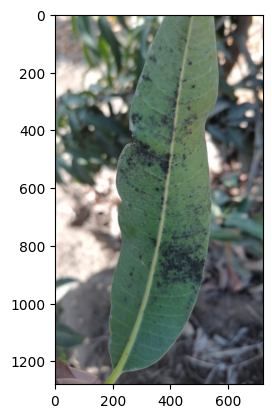

In [12]:
hojaSana = cv2.imread('E:/Fotos TFM/Enfermas/enfermaManchas.jpeg')
hojaSana = cv2.cvtColor(hojaSana, cv2.COLOR_BGR2RGB)
plt.imshow(hojaSana)

In [13]:
sift = cv2.xfeatures2d.SIFT_create()

In [14]:
kp1, desc1 = sift.detectAndCompute(hojaSana,None)

In [7]:
kp1

(< cv2.KeyPoint 0000025FE02E3EA0>,
 < cv2.KeyPoint 0000025FE01F3300>,
 < cv2.KeyPoint 0000025FE01F33C0>,
 < cv2.KeyPoint 0000025FF0D8B210>,
 < cv2.KeyPoint 0000025FF0D8B240>,
 < cv2.KeyPoint 0000025FF0D888A0>,
 < cv2.KeyPoint 0000025FF0D8B300>,
 < cv2.KeyPoint 0000025FF0D895C0>,
 < cv2.KeyPoint 0000025FF0D89530>,
 < cv2.KeyPoint 0000025FF0D88060>,
 < cv2.KeyPoint 0000025FF0D8B120>,
 < cv2.KeyPoint 0000025FF0D89200>,
 < cv2.KeyPoint 0000025FF0D89380>,
 < cv2.KeyPoint 0000025FF0D8B1B0>,
 < cv2.KeyPoint 0000025FF0D8B2D0>,
 < cv2.KeyPoint 0000025FF0D8B330>,
 < cv2.KeyPoint 0000025FF0D8B360>,
 < cv2.KeyPoint 0000025FF0D8B390>,
 < cv2.KeyPoint 0000025FF0D8B3C0>,
 < cv2.KeyPoint 0000025FF0D8B2A0>,
 < cv2.KeyPoint 0000025FF0D8B420>,
 < cv2.KeyPoint 0000025FF0D8B3F0>,
 < cv2.KeyPoint 0000025FF0D8B450>,
 < cv2.KeyPoint 0000025FF0D8B480>,
 < cv2.KeyPoint 0000025FF0D8B4B0>,
 < cv2.KeyPoint 0000025FF0D8B4E0>,
 < cv2.KeyPoint 0000025FF0D8B510>,
 < cv2.KeyPoint 0000025FF0D8B540>,
 < cv2.KeyPoint 0000

In [66]:
def CalcFeatures(img):
    sift = cv2.xfeatures2d.SIFT_create()
    kp, des = sift.detectAndCompute(img, None)
    return des

def bag_of_features(features, centres, k = 500):
    vec = np.zeros((1, k))
    for i in range(features.shape[0]):
        feat = features[i]
        diff = np.tile(feat, (k, 1)) - centres
        dist = pow(((pow(diff, 2)).sum(axis = 1)), 0.5)
        idx_dist = dist.argsort()
        idx = idx_dist[0]
        vec[0][idx] += 1
    return vec  


In [67]:
features = []

for img in leavesData:
    # img = cv2.imread(file, 0)
    img_des = CalcFeatures(img)
    if img_des is not None:
        features.append(img_des)
features = np.vstack(features)

k = 150
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 0.1)
flags = cv2.KMEANS_RANDOM_CENTERS
compactness, labels2, centres = cv2.kmeans(features, k, None, criteria, 10, flags)


In [68]:

vec = []

for img in leavesData:
    # img = cv2.imread(file, 0)
    img_des = CalcFeatures(img)
    if img_des is not None:
        img_vec = bag_of_features(img_des, centres, k)
        vec.append(img_vec)
 


vec = np.vstack(vec)

In [69]:
len(labels)


49

In [70]:
len(vec)

49

In [73]:
X_train, X_test, y_train, y_test = train_test_split(vec, labels, test_size=0.2)
clf = SVC()
clf.fit(X_train, y_train)
preds = clf.predict(X_test)
acc = accuracy_score(y_test, preds)
conf_mat = confusion_matrix(y_test, preds)

t1 = time.time()

print(acc*100, conf_mat)

100.0 [[4 0]
 [0 6]]


In [74]:
print( conf_mat)


[[4 0]
 [0 6]]
